In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
%matplotlib inline

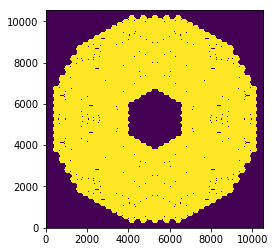

In [2]:
folder = '$HOME/dox/METIS/METIS_HCI_HEEPS_simulations/PUPIL'
folder = os.path.normpath(os.path.expandvars(folder))
spiders = fits.getdata(os.path.join(folder, 'SpiderShadow.fits'))
segment = fits.getdata(os.path.join(folder, 'SegmentationPattern.fits'))
plt.imshow(segment, origin=True)

## Create all-glass mask

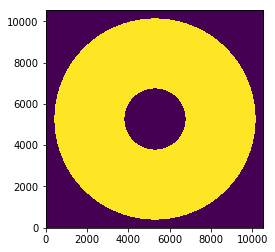

In [3]:
pupil_img_size = 39.9988
diam_ext = 36.905
diam_int = 11.213
npupil = np.shape(segment)[0]
dn = 2/npupil
pup_range = np.arange(-1, 1, dn) + dn/2
xi,yi = np.meshgrid(pup_range, pup_range)
ri = np.abs(xi + 1j*yi)
mask_allglass = (ri > diam_int/pupil_img_size) * (ri < diam_ext/pupil_img_size)
plt.imshow(mask_allglass, origin=True)
#fits.writeto(os.path.join(folder, 'mask_allglass.fits'), \
#             np.uint8(mask_allglass), overwrite=True)

## Invert masked pupil for manual inspection

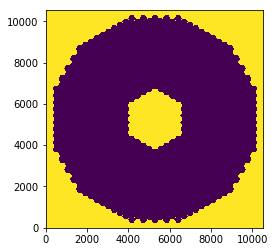

In [4]:
segment_neg = 1 - segment
segment_neg[mask_allglass] = 0
plt.imshow(segment_neg, origin=True)
#fits.writeto(os.path.join(folder, 'mask_M1_neg_imperfect.fits'), \
#             np.uint8(segment_neg), overwrite=True)

## Load pupil with manually removed residuals

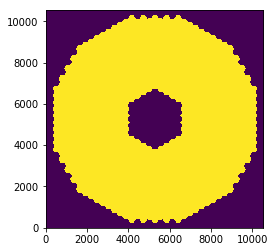

In [4]:
M1 = fits.getdata(os.path.join(folder, 'mask_M1.fits'))
plt.imshow(M1, origin=True)

## Add spiders

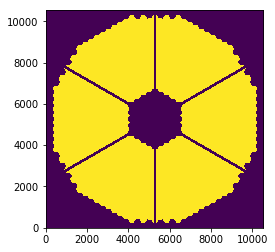

In [6]:
M1_spi = M1 * spiders
plt.imshow(M1_spi, origin=True)

## Calculate pupil translations
### 1- segmented pupil

In [7]:
def pupil_translat(pupil, translat, ring_thick=1e-2):
    npupil = pupil.shape[0]
    translat_size = int(np.ceil(translat*npupil))
    translat_size += 1 - translat_size % 2
    dn = 2/(translat_size - 1)
    translat_range = np.arange(-1, 1+dn, dn)
    x,y = np.meshgrid(translat_range, translat_range)
    r = np.abs(x + 1j*y)
    r_max = translat*npupil/translat_size
    ring = (r < r_max) * (r > r_max*(1 - ring_thick))
    margin = int((translat_size - 1)/2)
    pupil_stop = np.ones((npupil + 2*margin, npupil + 2*margin))
    for i in range(translat_size):
        print(i)
        for j in range(translat_size):
            if ring[i,j] == True:
                pupil_stop[i:i-2*margin, j:j-2*margin] *= pupil
    pupil_stop = pupil_stop[margin:-margin,margin:-margin]
    return pupil_stop, ring 

In [8]:
diam_nominal_pupil = 38.542
translat_seg = 0.0282*diam_nominal_pupil/pupil_img_size
pupil_stop_seg, ring_seg = pupil_translat(M1, translat_seg)
plt.imshow(pupil_stop_seg, origin=True)
pupil_stop_seg.shape

In [9]:
translat_spi = 0.037*diam_nominal_pupil/pupil_img_size
pupil_stop_spi, ring_spi = pupil_translat(spiders, translat_spi)
plt.imshow(pupil_stop_spi, origin=True)
pupil_stop_spi.shape

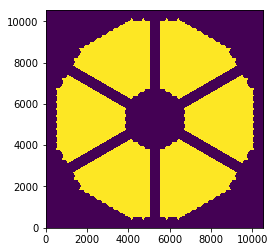

In [10]:
pupil_stop = pupil_stop_seg*pupil_stop_spi
plt.imshow(pupil_stop, origin=True)
fits.writeto(os.path.join(folder, 'pupil_stop.fits'), \
             np.uint8(pupil_stop), overwrite=True)

a1  =1.047361824823104
pi/3=1.0471975511965976

a2  =0.5233678423036151
a4  =0.5240965688553664
pi/6=0.5235987755982988


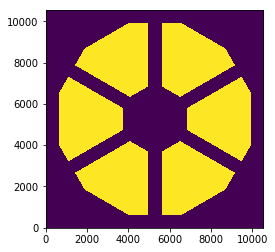

In [124]:
# outer edge
P1 = (802,6825)
a1 = (8303-P1[1])/(1655-P1[0])
P2 = (1847,8659)
a2 = (9775-P2[1])/(3781-P2[0])
x3 = 615
y3 = 618
nplus1 = 10526 + 1
x,y = np.meshgrid(np.arange(1, nplus1),np.arange(1, nplus1))
M1 = (y < a1*x + P1[1] - a1*P1[0]) \
   * (y < -a1*x + P1[1] + a1*(nplus1 - P1[0])) \
   * (y > a1*x + (nplus1 - P1[1]) - a1*(nplus1 - P1[0])) \
   * (y > -a1*x + (nplus1 - P1[1]) + a1*P1[0])
M2 = (y < a2*x + P2[1] - a2*P2[0]) \
   * (y < -a2*x + P2[1] + a2*(nplus1 - P2[0])) \
   * (y > a2*x + (nplus1 - P2[1]) - a2*(nplus1 - P2[0])) \
   * (y > -a2*x + (nplus1 - P2[1]) + a2*P2[0])
M3 = (x > x3) * (x < nplus1 - x3) * (y > y3) * (y < nplus1 - y3)
# inner edge
P4 = (4218, 6424)
a4 = (6750-P4[1])/(4782-P4[0])
x5 = 3736
y5 = 3749
M4 = (y > a4*x + P4[1] - a4*P4[0]) \
   + (y > -a4*x + P4[1] + a4*(nplus1 - P4[0])) \
   + (y < a4*x + (nplus1 - P4[1]) - a4*(nplus1 - P4[0])) \
   + (y < -a4*x + (nplus1 - P4[1]) + a4*P4[0])
M5 = (x < x5) + (x > nplus1 - x5) #+ (y < y5) + (y > nplus1 - y5)
mask = (M1 * M2 * M3) * (M4 + M5)
APP_stop = fits.getdata('/Users/cdelacroix/INSTRUMENTS/METIS/ELT_pupils/APP_stop_round.fits')
APP_stop *= mask
plt.imshow(APP_stop, origin=True)
fits.writeto('APP_stop.fits', np.uint8(APP_stop), overwrite=True)
print('a1  =%s\npi/3=%s\n'%(np.arctan(a1), np.pi/3))
print('a2  =%s\na4  =%s\npi/6=%s'%(np.arctan(a2), np.arctan(a4), np.pi/6))

In [127]:
from heeps.util.img_processing import resize_img
fits.writeto('APP_stop_L.fits', np.float32(resize_img(np.float32(APP_stop), 285)), overwrite=True)
fits.writeto('APP_stop_M.fits', np.float32(resize_img(np.float32(APP_stop), 227)), overwrite=True)
fits.info('APP_stop_L.fits')

Filename: APP_stop_L.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (285, 285)   float32   
